1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


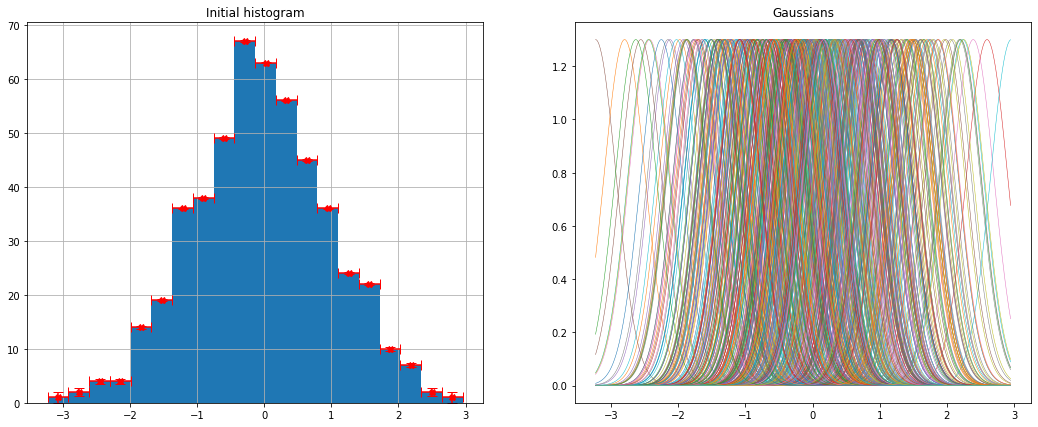

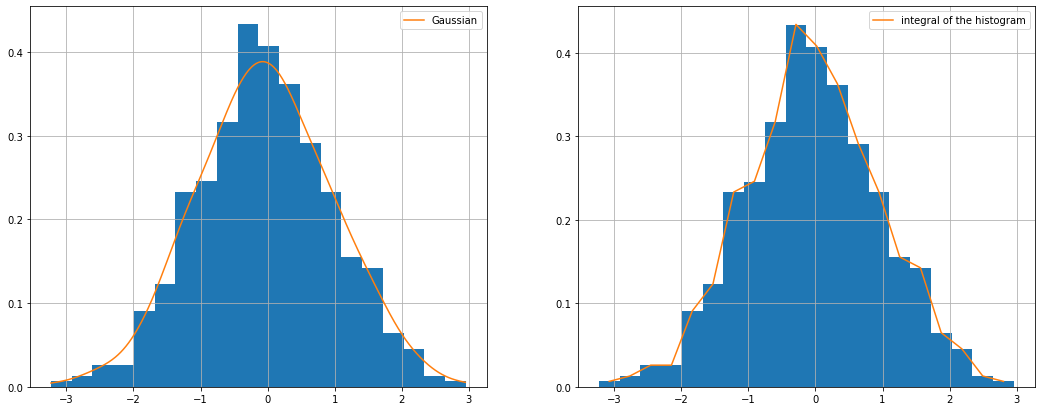

(None, None, None)

In [1]:
import numpy as np
import numpy.random as npr
from scipy.stats import norm
from scipy.integrate import trapz
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
npr.seed(123)
x = npr.normal(0,1,500)
n, bins, _ = ax1.hist(x, 20)
bins_medio =  (bins[1:]+bins[:-1])/2
ax1.errorbar(bins_medio, n, xerr = (bins[1:]-bins[:-1])/2, yerr =np.power(n,-0.5) ,color="red", fmt='X',capthick=1, capsize=5)
ax1.set_title('Initial histogram')
k = np.arange(x.min(),x.max(),0.01)
std = 1.06*x.std()*np.power(len(x),-1/5)
gaussians = np.array([norm.pdf(k, i, std) for i in x])
for gaussian in gaussians:
    ax2.plot(k, gaussian,linewidth=0.5,)
ax2.set_title('Gaussians' ),ax1.grid(),plt.show()

fig, (ax1_1, ax2_2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
somma = np.sum([norm.pdf(k,x[i],scale = std) for i in range(len(x))],axis=0)
g = somma/trapz(somma,k)
ax1_1.hist(x, bins=20,density=True)
ax1_1.plot(k,g, label= "Gaussian"),ax1_1.legend(loc="best",  frameon=True)
altezza=n/trapz(n,bins_medio)
ax2_2.hist(x, bins=20,density=True)
ax2_2.plot(bins_medio,altezza,label= "integral of the histogram"),ax2_2.legend(loc="best", frameon=True)
ax2_2.grid(),ax1_1.grid(),plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

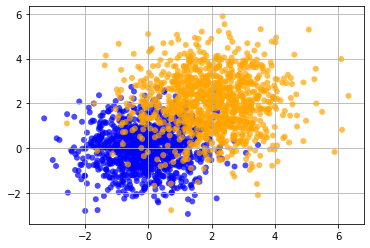

(None, None)

In [47]:

def gauss_2d(mean, std):
    x = npr.normal( mean,std,1000)
    y = npr.normal( mean,std,1000)
    return (x, y)

f1x,f1y = gauss_2d(0,1)
f2x,f2y = gauss_2d(2,1.25)

plt.scatter(f1x,f1y, c = 'blue', alpha=0.7, edgecolors='none')
plt.scatter(f2x,f2y, c = 'orange', alpha=0.7, edgecolors='none')
plt.grid(True),plt.show()


center=np.empty(25)
for i in range (0,25):
    center[i]=(x_max-x_min)/(2*N)+x_min+i*(x_max-x_min)/N

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

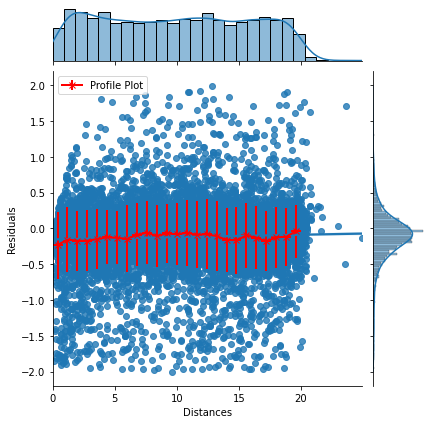

In [39]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

data=np.load("/Users/ITC/Desktop/magistrale/CORSI PRIMO SEMESTRE/lab_temporaneo/residuals_261.npy", allow_pickle=True)
data = pd.DataFrame( data.item(),  columns=['residuals','distances'])
data=data[np.abs(data["residuals"]) < 2]

slope, intercept, r_value, p_value, std_err = stats.linregress(data["residuals"], data["distances"])
plot=sns.jointplot(x="distances", y="residuals", data=data, kind= "reg", dropna=True)

x_min=0;x_max=20;N=25
binn=x_min+(x_max-x_min)/N*np.arange(0,N+1,1)
bincenters = x_min+((x_max-x_min)/(2*N))+ ((x_max-x_min)/N)*np.arange(N) 
x = bincenters

data['bin'] = np.digitize(data['distances'], binn)
ProfileFrame = pd.DataFrame({'bincenters' : bincenters, 'N' : data['bin'].value_counts(sort=False)},index=range(1,N+1))
bins = ProfileFrame.index.values

for bin in bins:
    ProfileFrame.loc[bin,'ymean'] = data.loc[data['bin']==bin,'residuals'].mean()
    ProfileFrame.loc[bin,'yStandDev'] = data.loc[data['bin']==bin,'residuals'].std()
    ProfileFrame.loc[bin,'yMeanError'] = ProfileFrame.loc[bin,'yStandDev']

plt.errorbar(ProfileFrame['bincenters'],ProfileFrame['ymean'], xerr=(x_max-x_min)/(2*N),linewidth=2, yerr=ProfileFrame['yMeanError'],label='Profile Plot', color='red',marker='x')
plt.xlabel('Distances'),plt.ylabel('Residuals'),plt.legend()
plt.show()
